In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

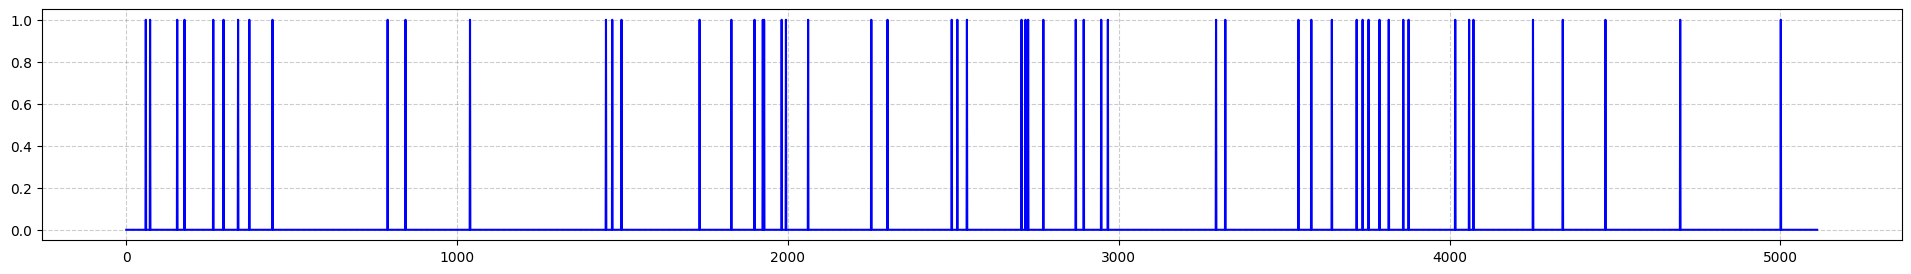

In [2]:
sig_off = [0]
sig_on = [0, 1, 0]
sig = np.concatenate(np.random.choice([sig_on, sig_off], size = 5000, p = [.01, .99]))
plt.figure(figsize = (24, 3))
plt.plot(sig, color = 'blue')
plt.grid(color = 'gray', linestyle = "--", alpha = .4)

## 以window size上去看signal on的數量

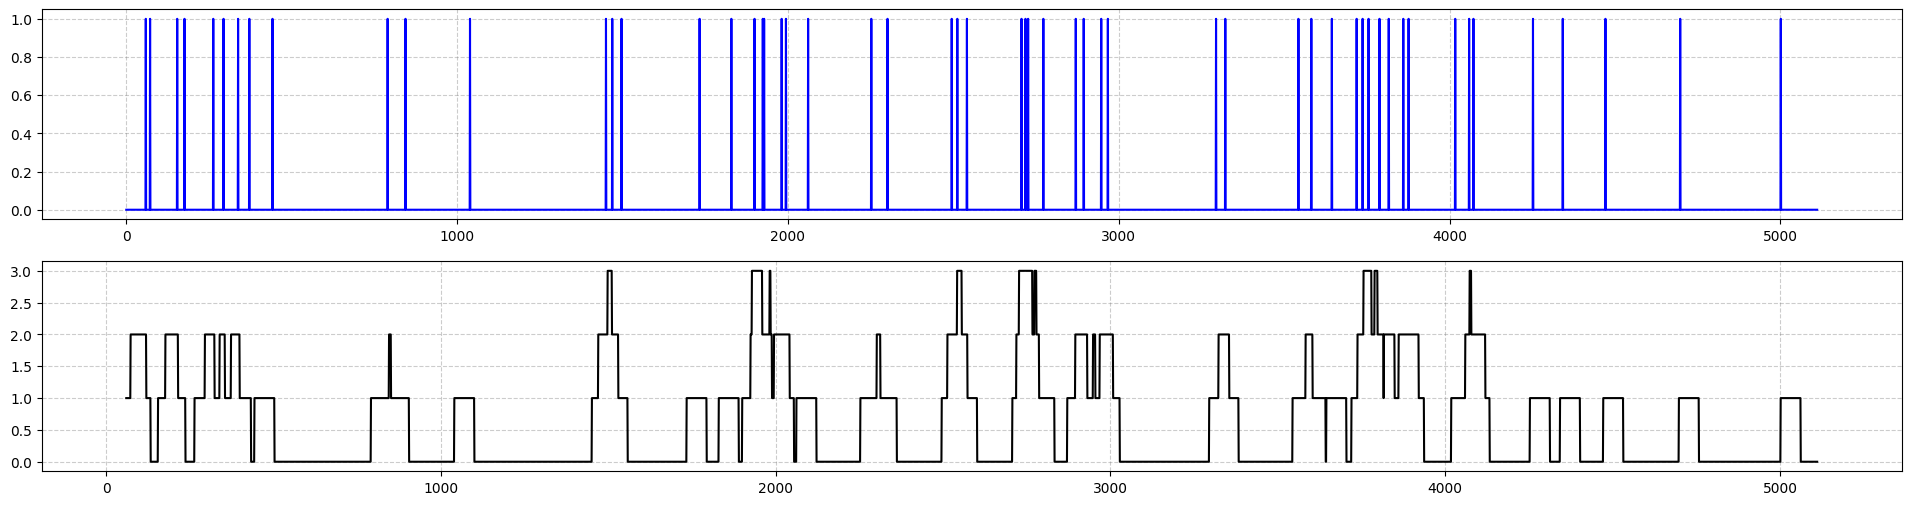

In [3]:
win_size = 60
freq_sig = list()
for i in range(win_size, sig.shape[0]):
    temp = sig[i-win_size:i]
    freq_sig += [np.sum(temp)]

fig, ax = plt.subplots(2, 1, figsize = (24, 6))
ax[0].plot(np.arange(sig.shape[0]), sig, color = 'blue')
ax[0].grid(color = 'gray', linestyle = "--", alpha = .4)
ax[1].plot(np.arange(win_size, sig.shape[0]), freq_sig, color = 'black')
ax[1].grid(color = 'gray', linestyle = "--", alpha = .4)

## 以頻域觀察數量

<Figure size 2400x300 with 0 Axes>

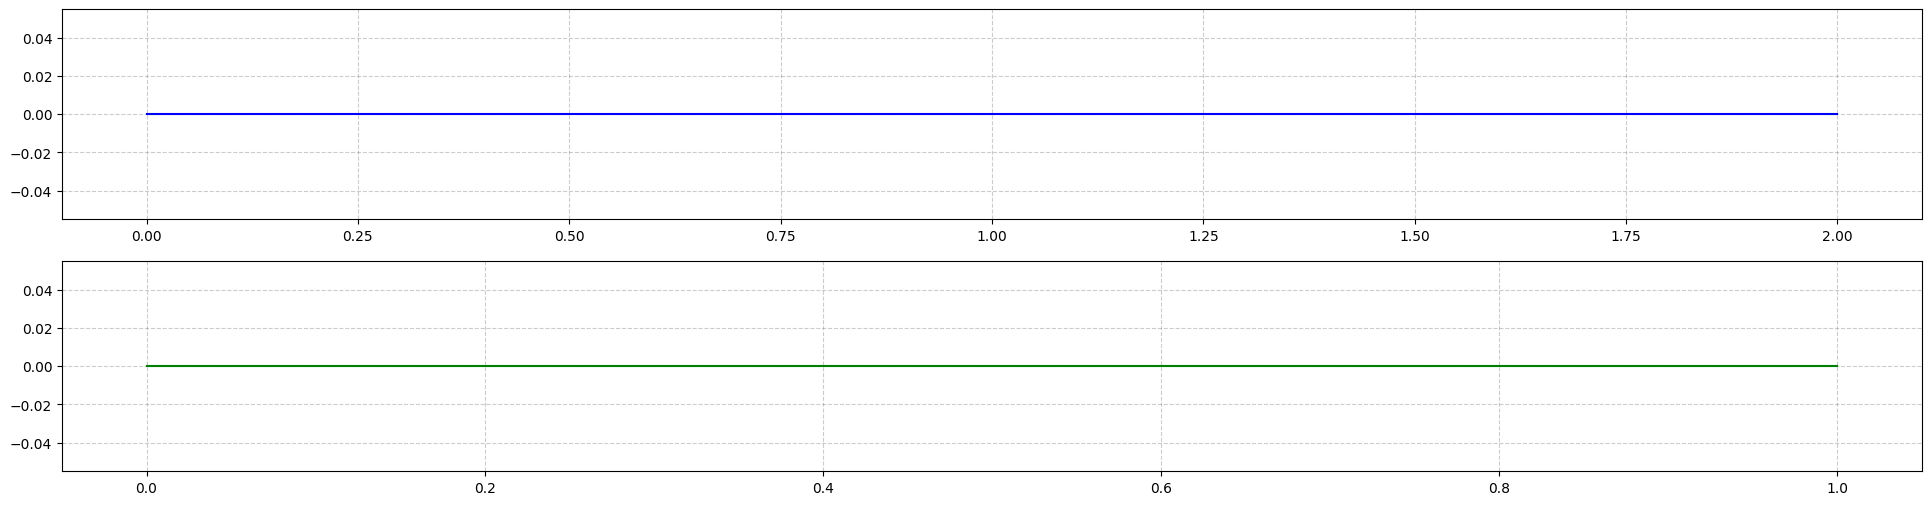

<Figure size 2400x300 with 0 Axes>

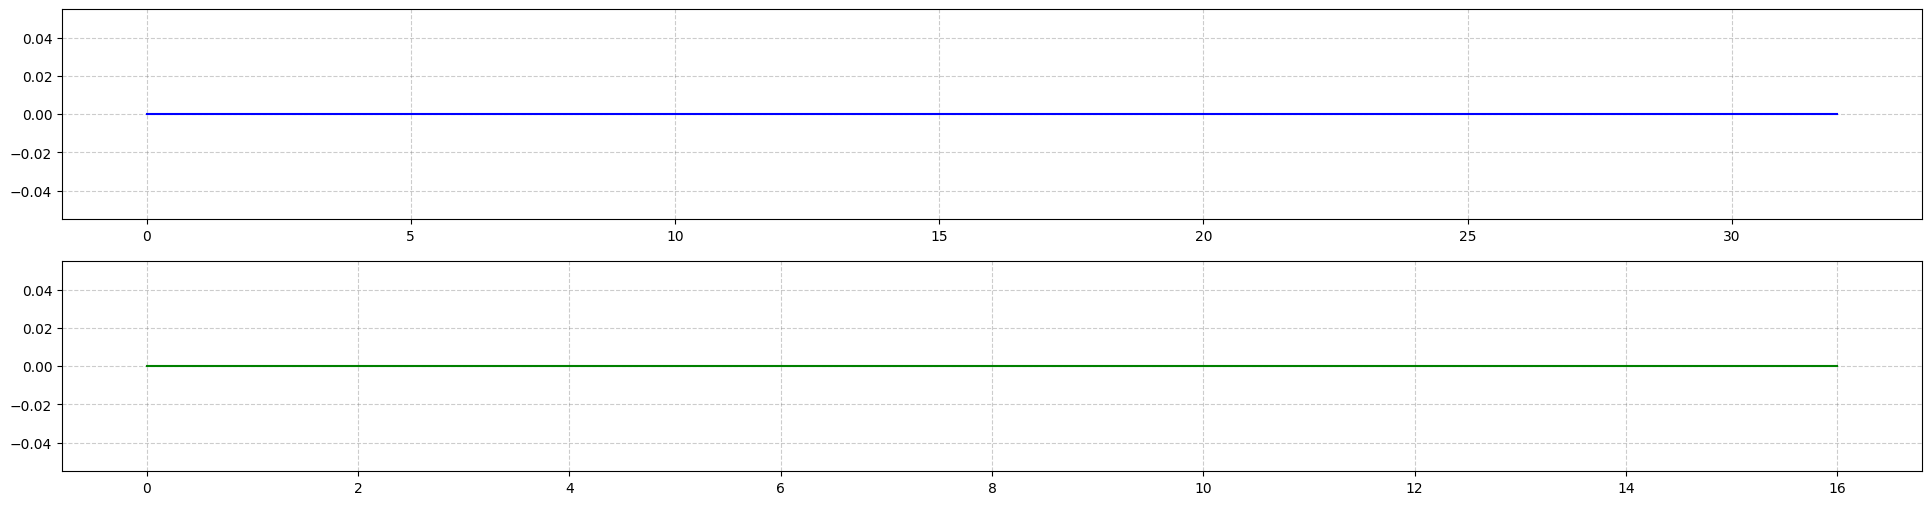

<Figure size 2400x300 with 0 Axes>

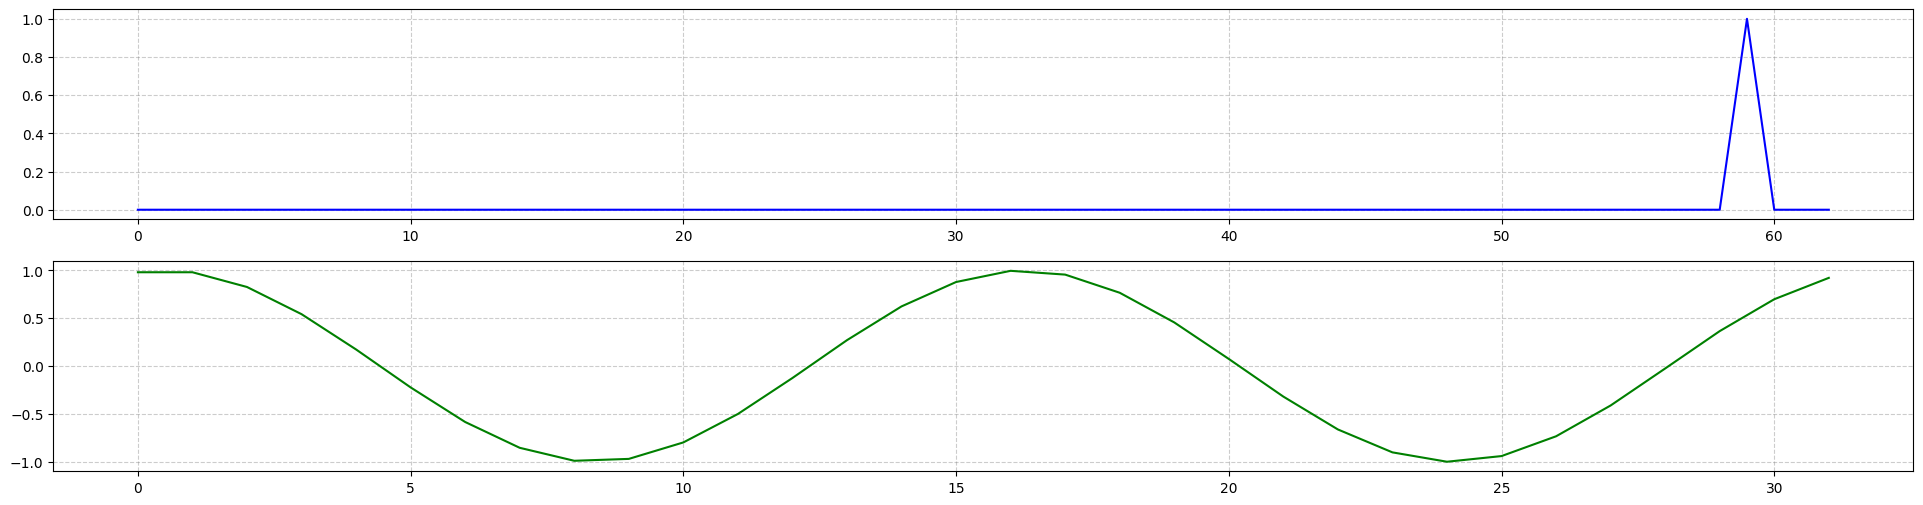

<Figure size 2400x300 with 0 Axes>

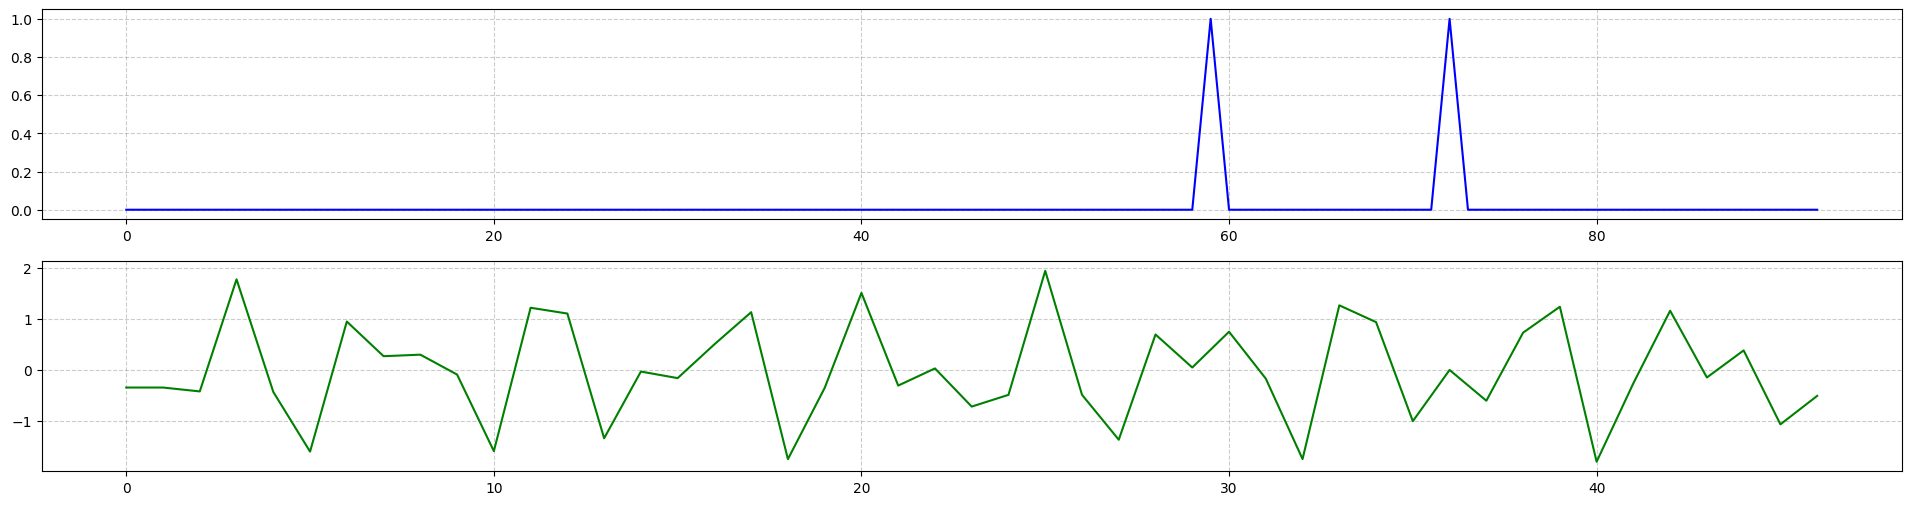

<Figure size 2400x300 with 0 Axes>

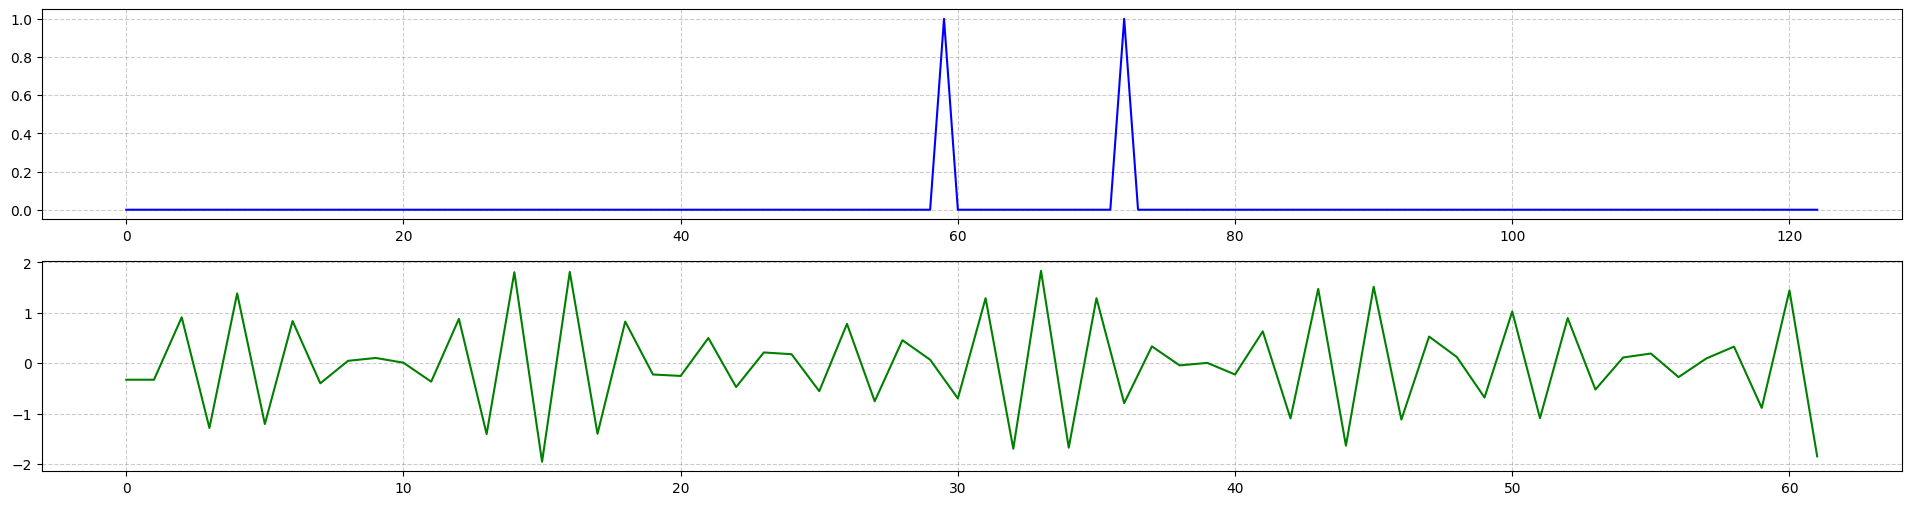

<Figure size 2400x300 with 0 Axes>

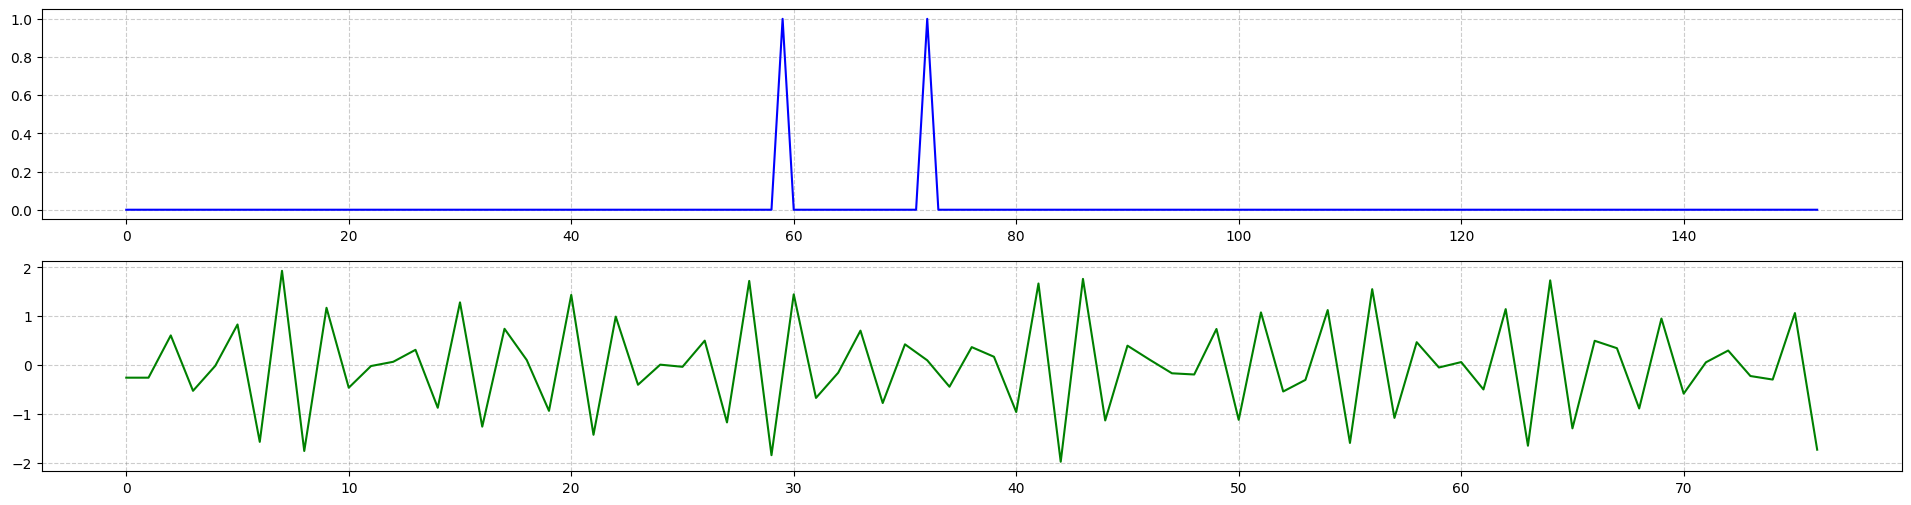

<Figure size 2400x300 with 0 Axes>

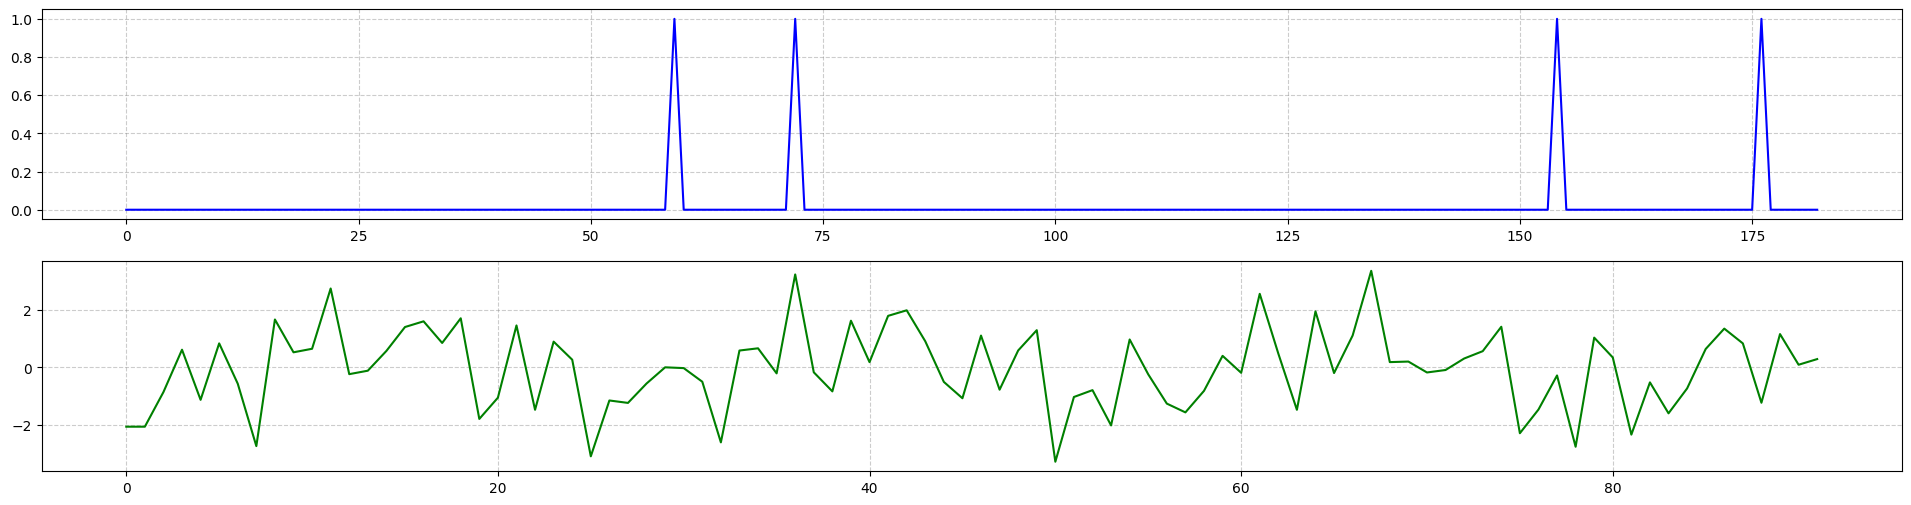

<Figure size 2400x300 with 0 Axes>

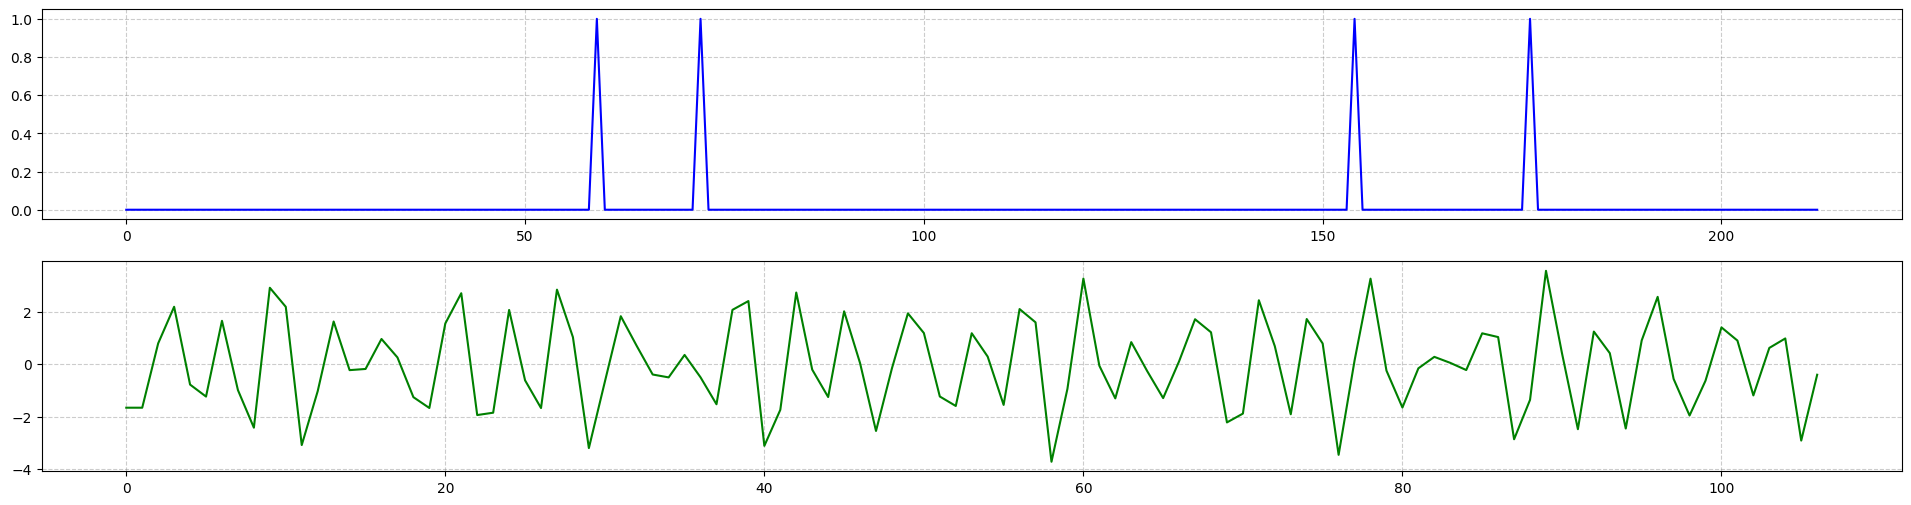

<Figure size 2400x300 with 0 Axes>

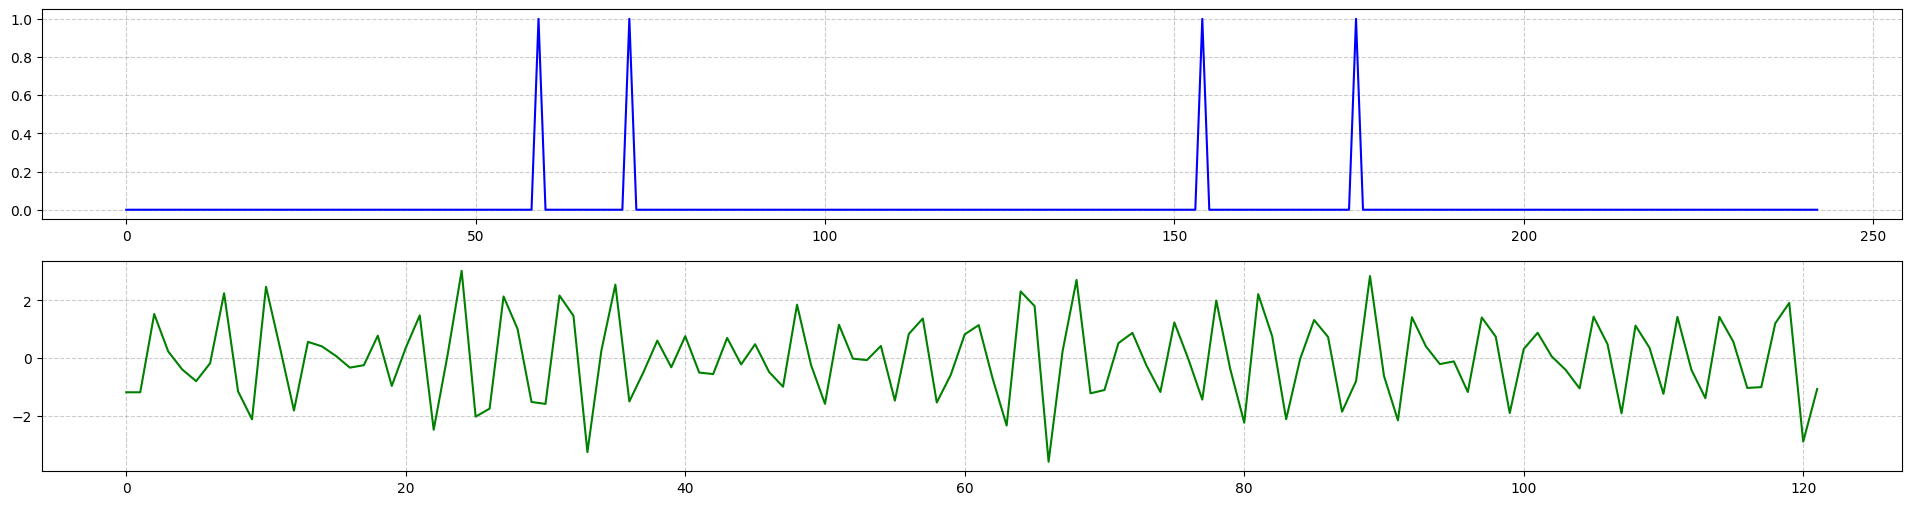

<Figure size 2400x300 with 0 Axes>

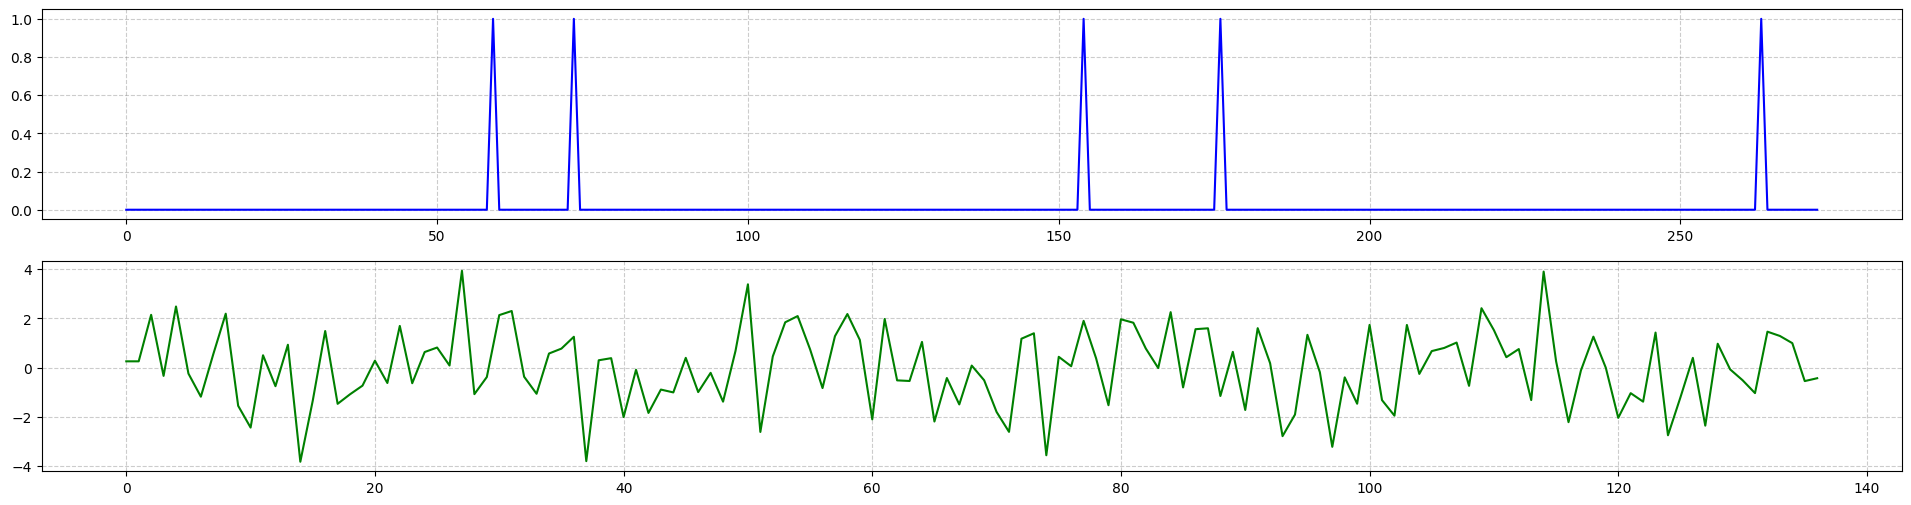

<Figure size 2400x300 with 0 Axes>

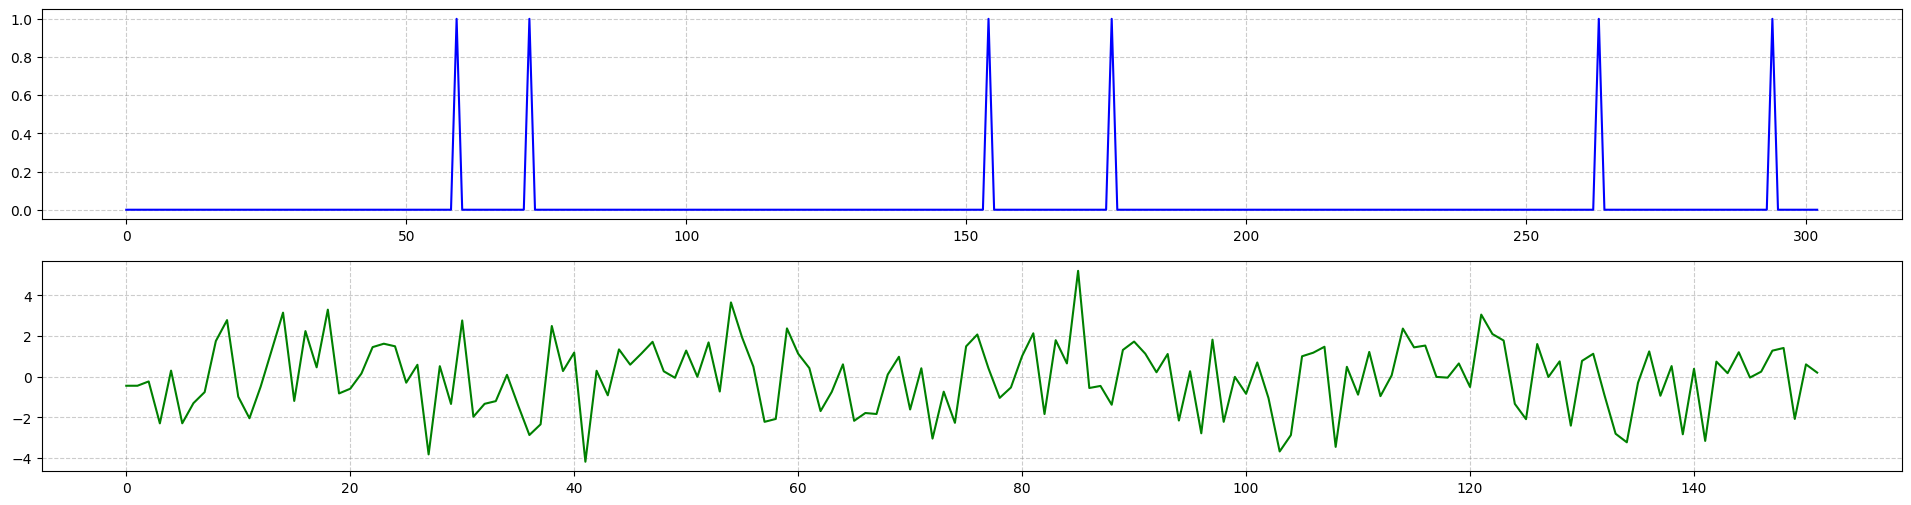

<Figure size 2400x300 with 0 Axes>

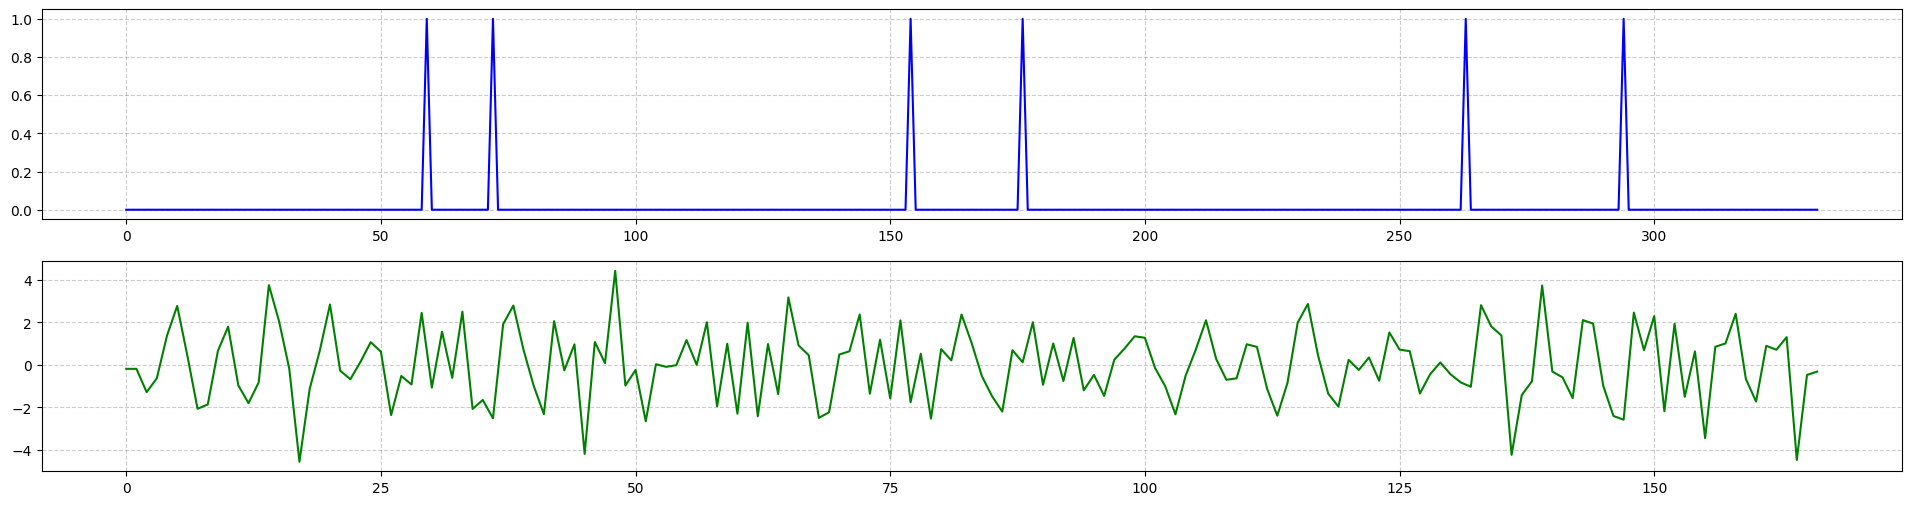

<Figure size 2400x300 with 0 Axes>

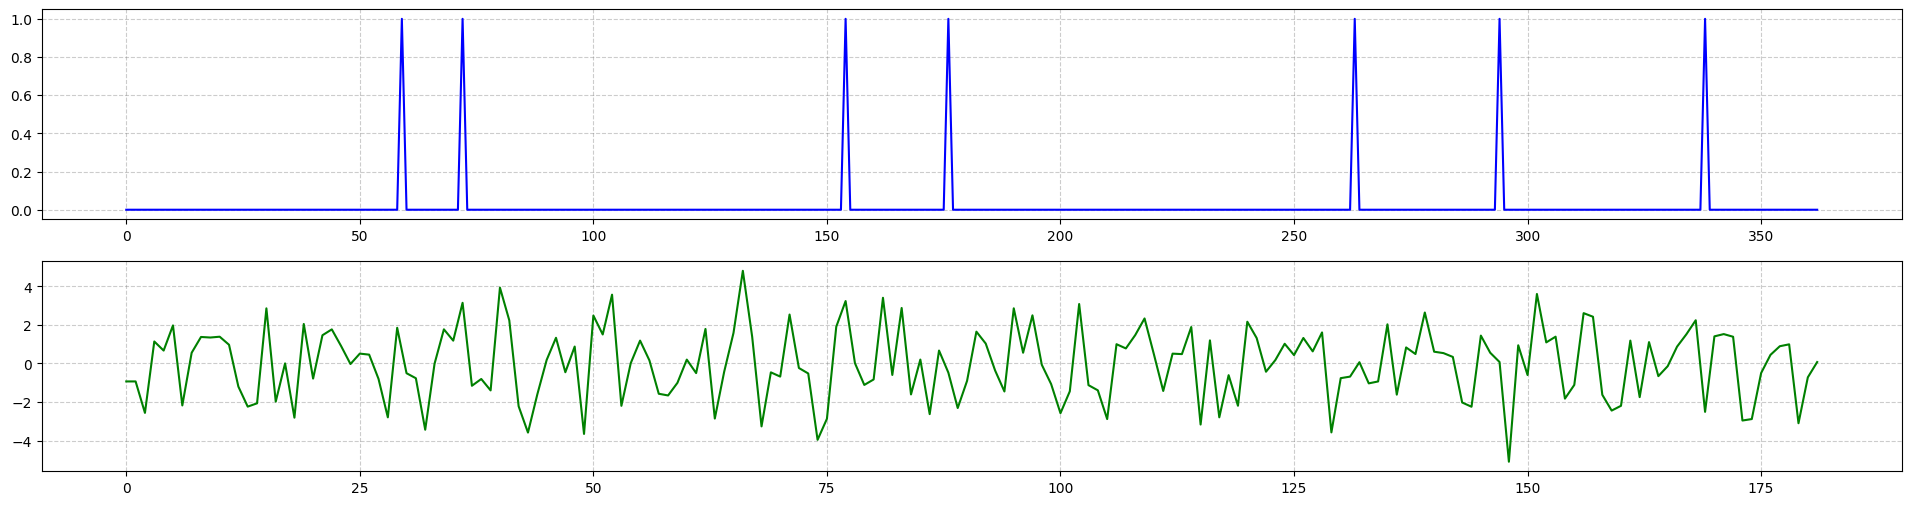

<Figure size 2400x300 with 0 Axes>

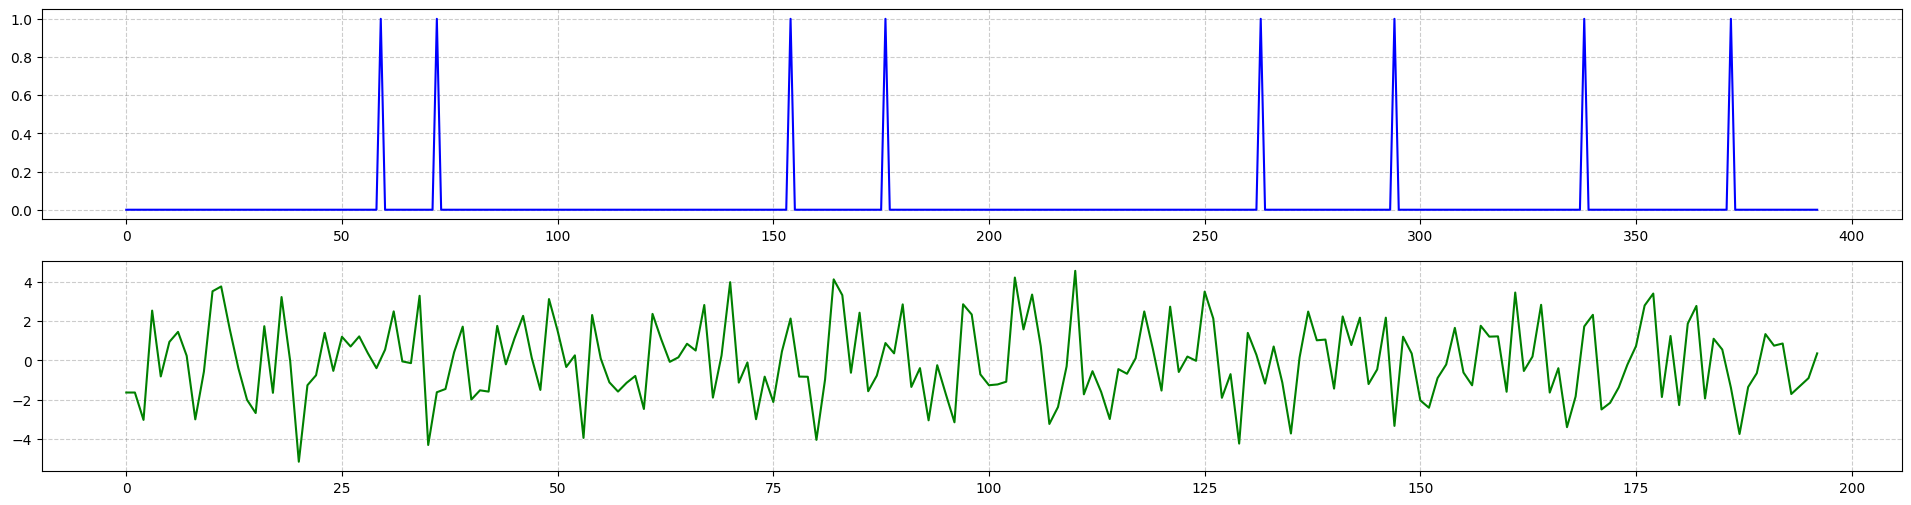

<Figure size 2400x300 with 0 Axes>

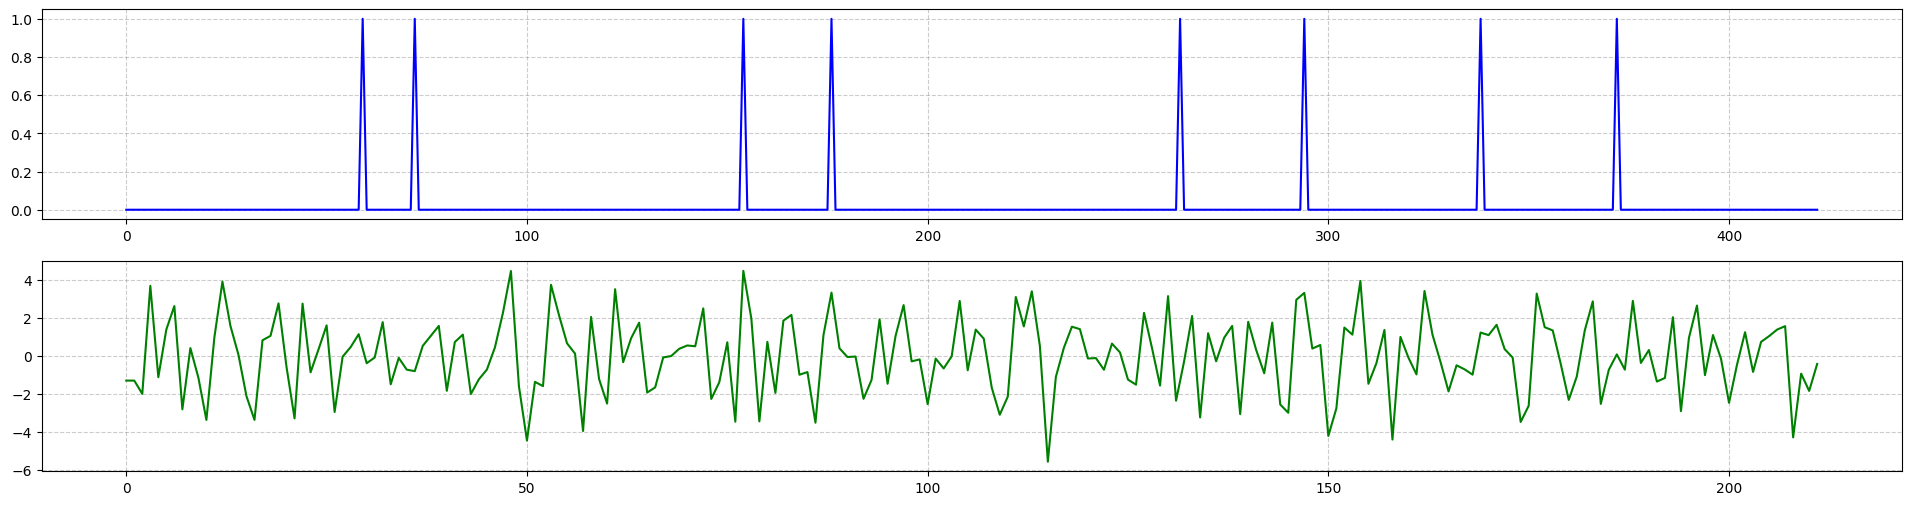

<Figure size 2400x300 with 0 Axes>

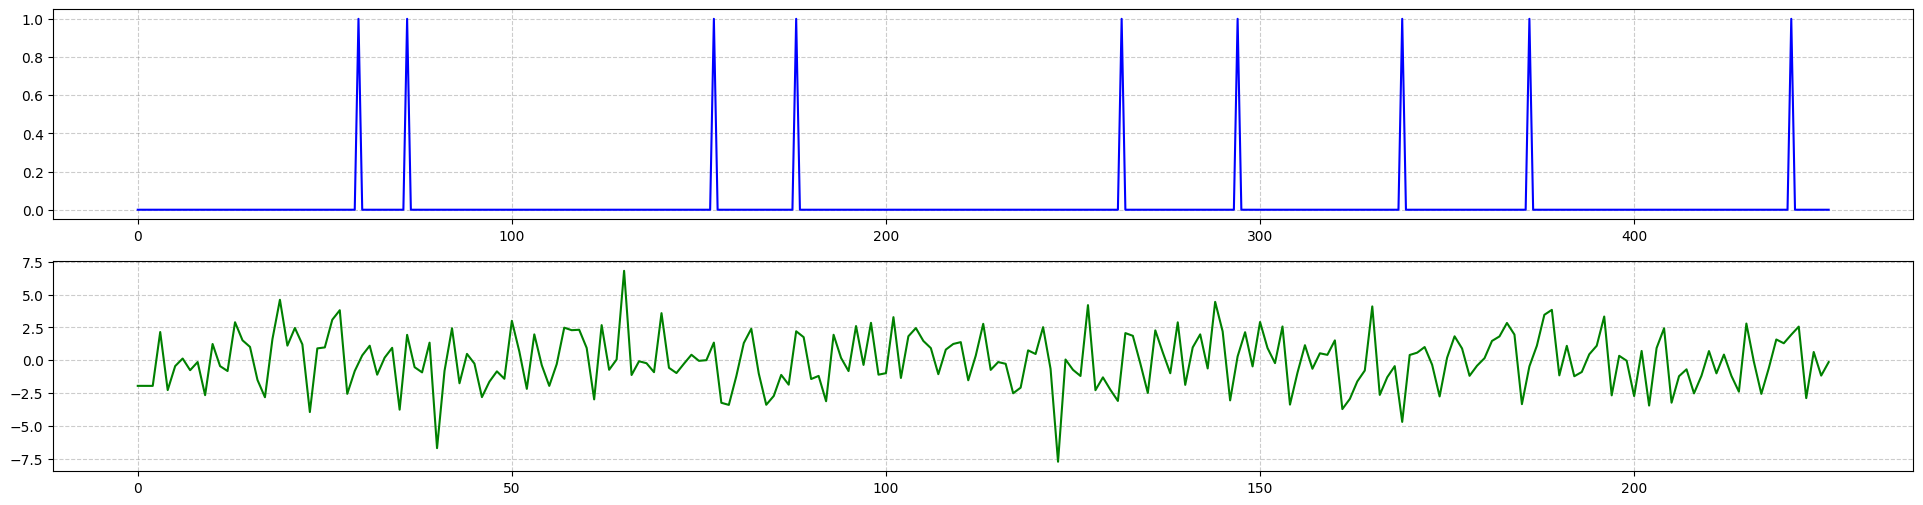

<Figure size 2400x300 with 0 Axes>

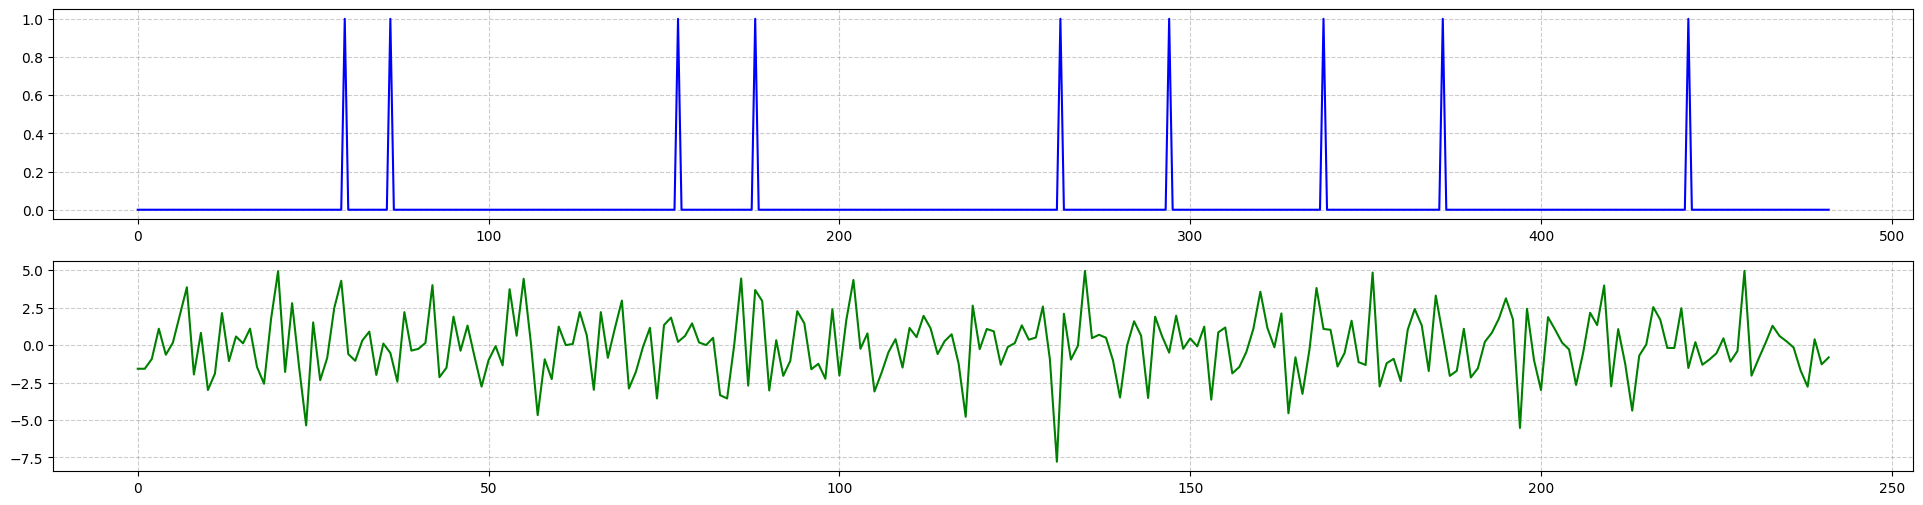

<Figure size 2400x300 with 0 Axes>

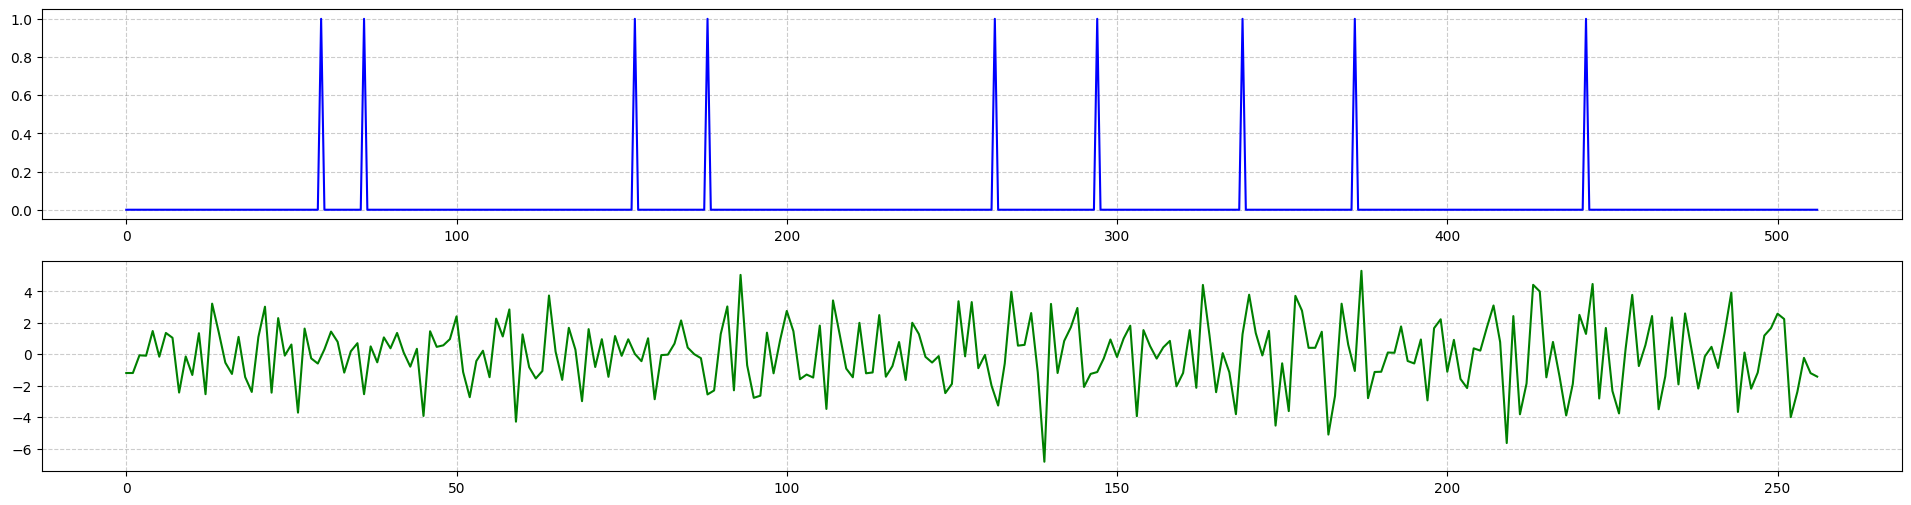

<Figure size 2400x300 with 0 Axes>

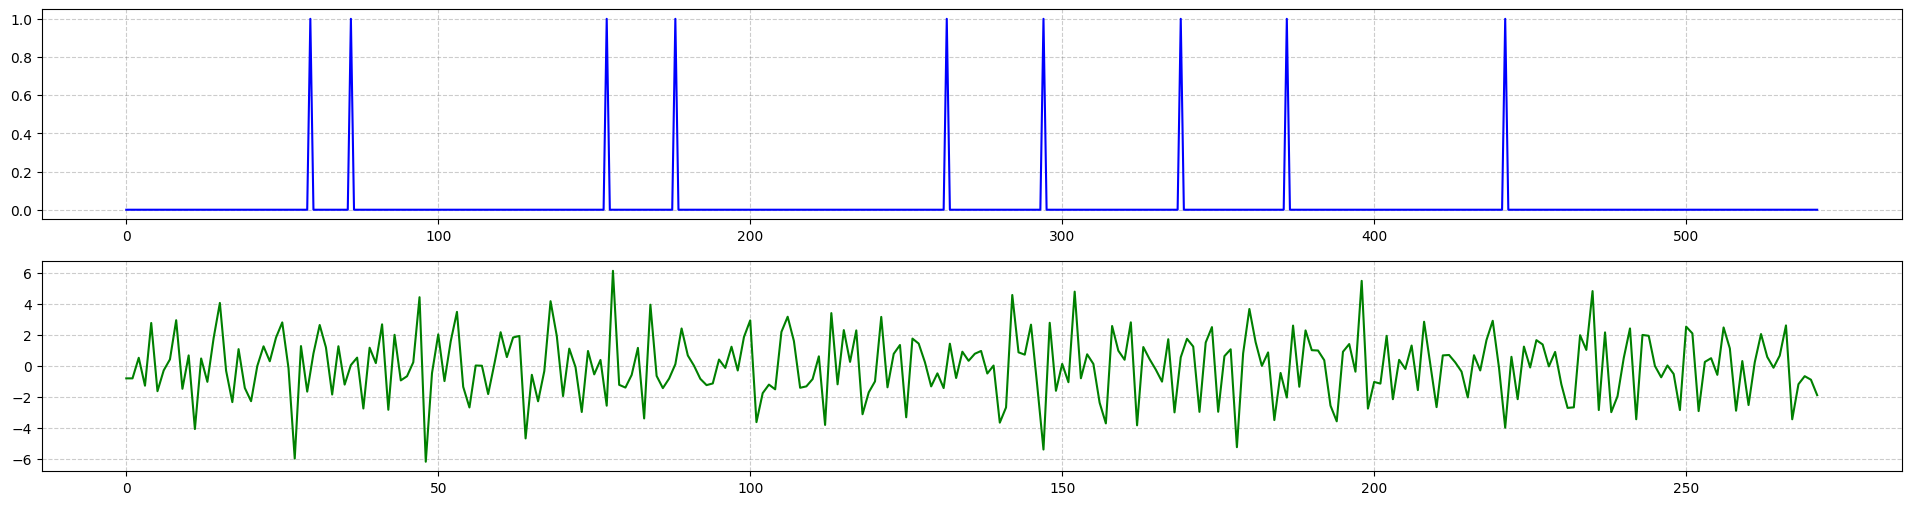

<Figure size 2400x300 with 0 Axes>

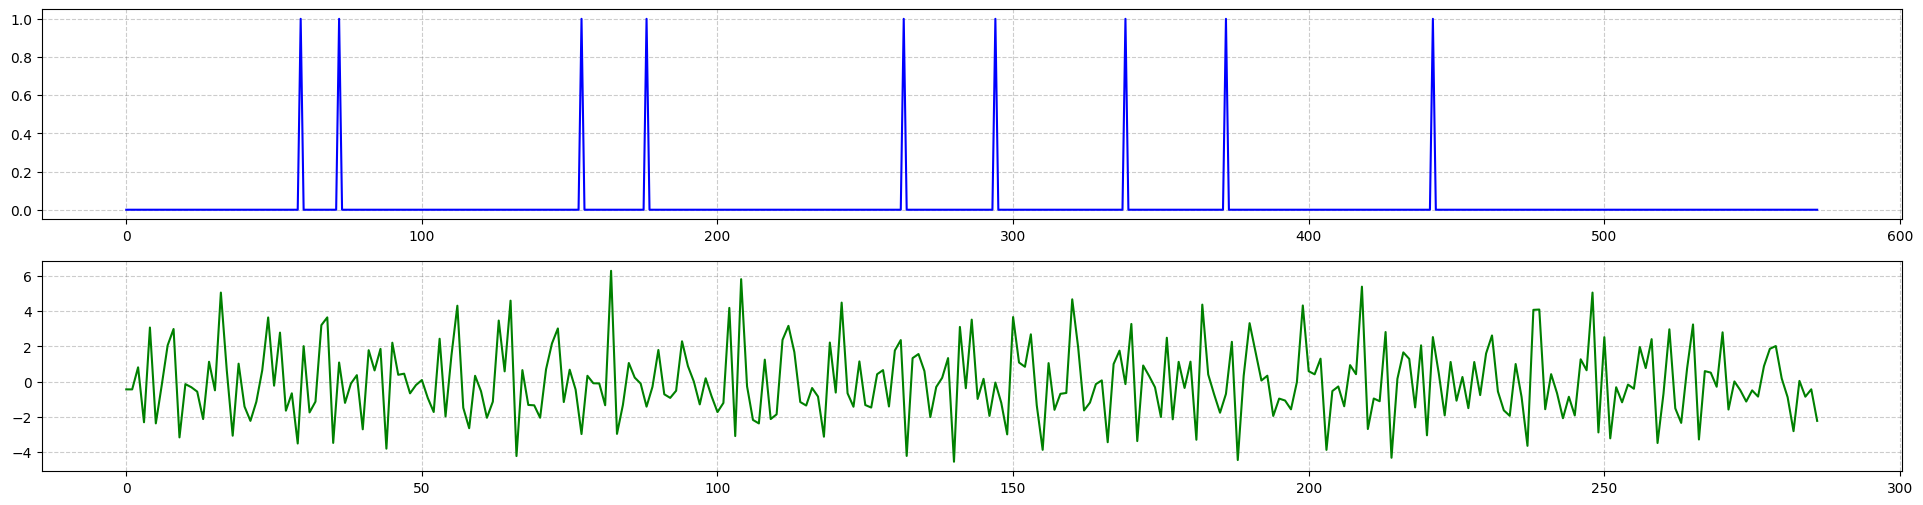

In [4]:
import gc
import time
from IPython.display import clear_output
st = 3

count = 0
for i in range(0, len(sig), 30):
    # clear_output()
    plt.figure(figsize = (24, 3))
    temp = sig[:st+i]
    fig, ax = plt.subplots(2, 1, figsize = (24, 6))
    ax[0].plot(temp, color = "blue")
    ax[0].grid(color = "gray", linestyle = "--", alpha = .4)
    ax[1].plot(np.fft.fft(temp)[temp.shape[0]//2:], color = "green")
    ax[1].grid(color = "gray", linestyle = "--", alpha = .4)
    plt.show()
    del fig, ax
    gc.collect()
    count += 1
    if count >= 20:
        break

變化點的位置: [ 640 1152 1664 3456]


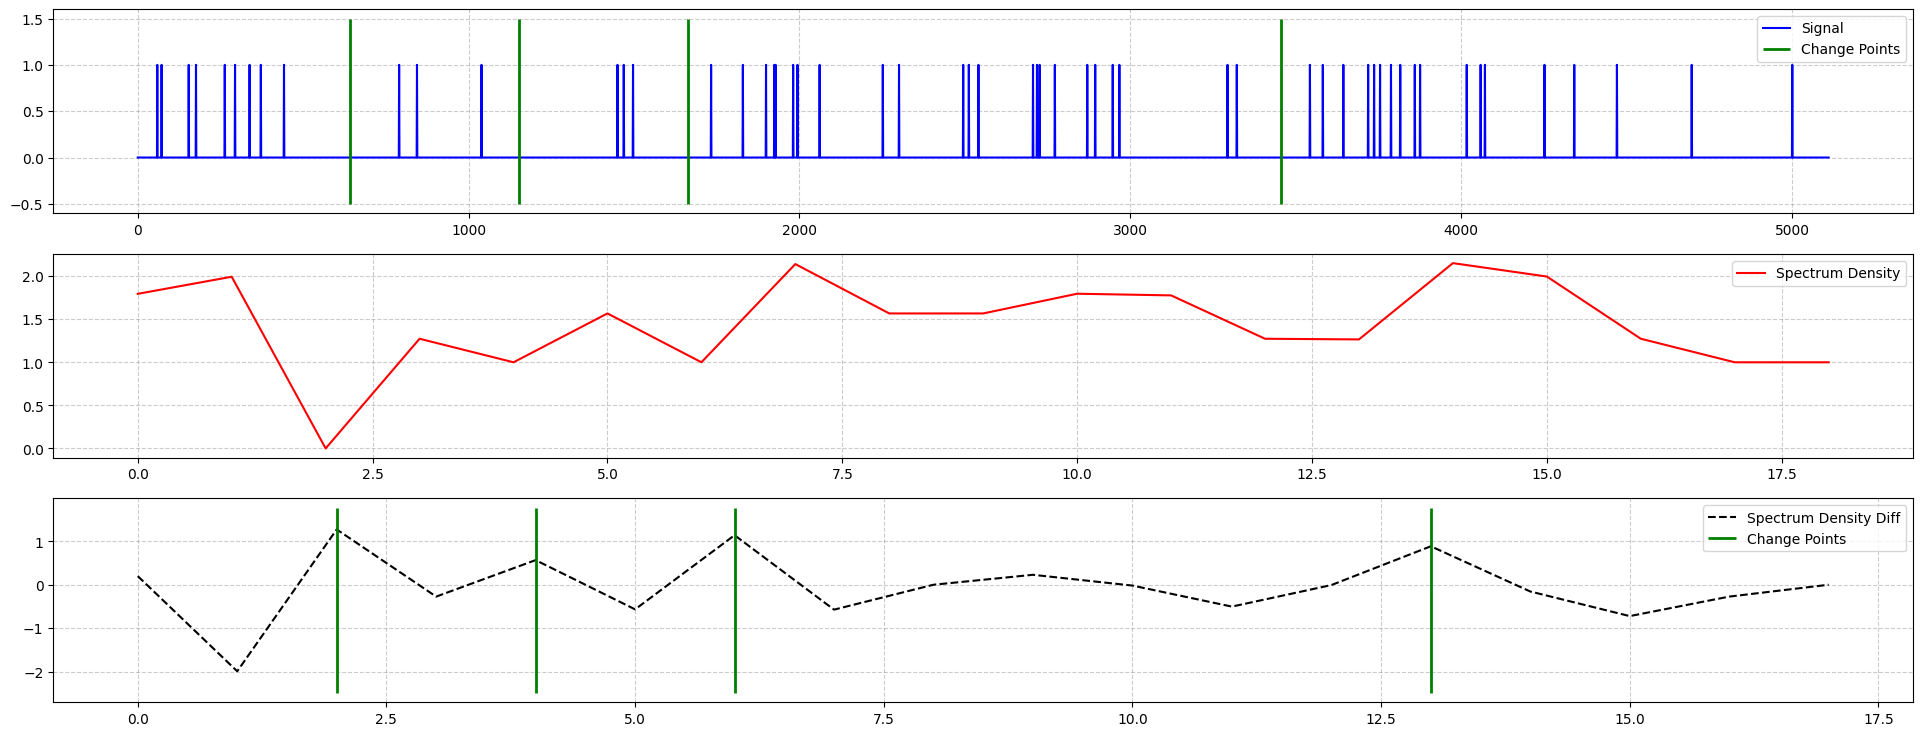

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
# 設置窗口大小
window_size = 256

# 定義函數來計算窗口內的FFT
def compute_fft(signal, window_size):
    fft_result = []
    for i in range(0, len(signal) - window_size + 1, window_size):
        window = signal[i:i + window_size]
        yf = fft(window)
        fft_result.append(np.abs(yf[window_size//2:]))
    return np.array(fft_result)

# 計算信號的FFT
fft_result = compute_fft(sig, window_size)

# 計算頻譜密度
spectrum_density = np.mean(fft_result, axis=1)

# 找出由疏變密的時間點（這裡使用簡單的差分來檢測變化）
threshold = 0.5  # 定義一個閾值來檢測變化
change_points = np.where(np.diff(spectrum_density) > threshold)[0]

# 可視化結果
fig, ax = plt.subplots(3, 1, figsize = (24, 9))
ax[0].plot(sig, label='Signal', color = "blue")
ax[0].grid(color = "gray", linestyle = "--", alpha = .4)
ax[0].vlines(change_points * window_size + window_size//2, -0.5, 1.5, linewidth = 2,
             color='green', label='Change Points')
ax[0].legend()

ax[1].plot(spectrum_density, label='Spectrum Density', color='red')
ax[1].grid(color = "gray", linestyle = "--", alpha = .4)
ax[1].legend()

temp = np.diff(spectrum_density)
ax[2].plot(temp, label='Spectrum Density Diff', color='black', linestyle = "--")
ax[2].vlines(change_points, np.min(temp) - 0.5, np.max(temp) + 0.5, linewidth = 2,
             color='green', label='Change Points')
ax[2].grid(color = "gray", linestyle = "--", alpha = .4)
ax[2].legend()

print("變化點的位置:", change_points * window_size + window_size//2)

100%|█████████████████████████████████████████████████████████████████████████████| 4856/4856 [00:06<00:00, 693.99it/s]


變化點的位置: [ 136832  305792  777856 1214848]


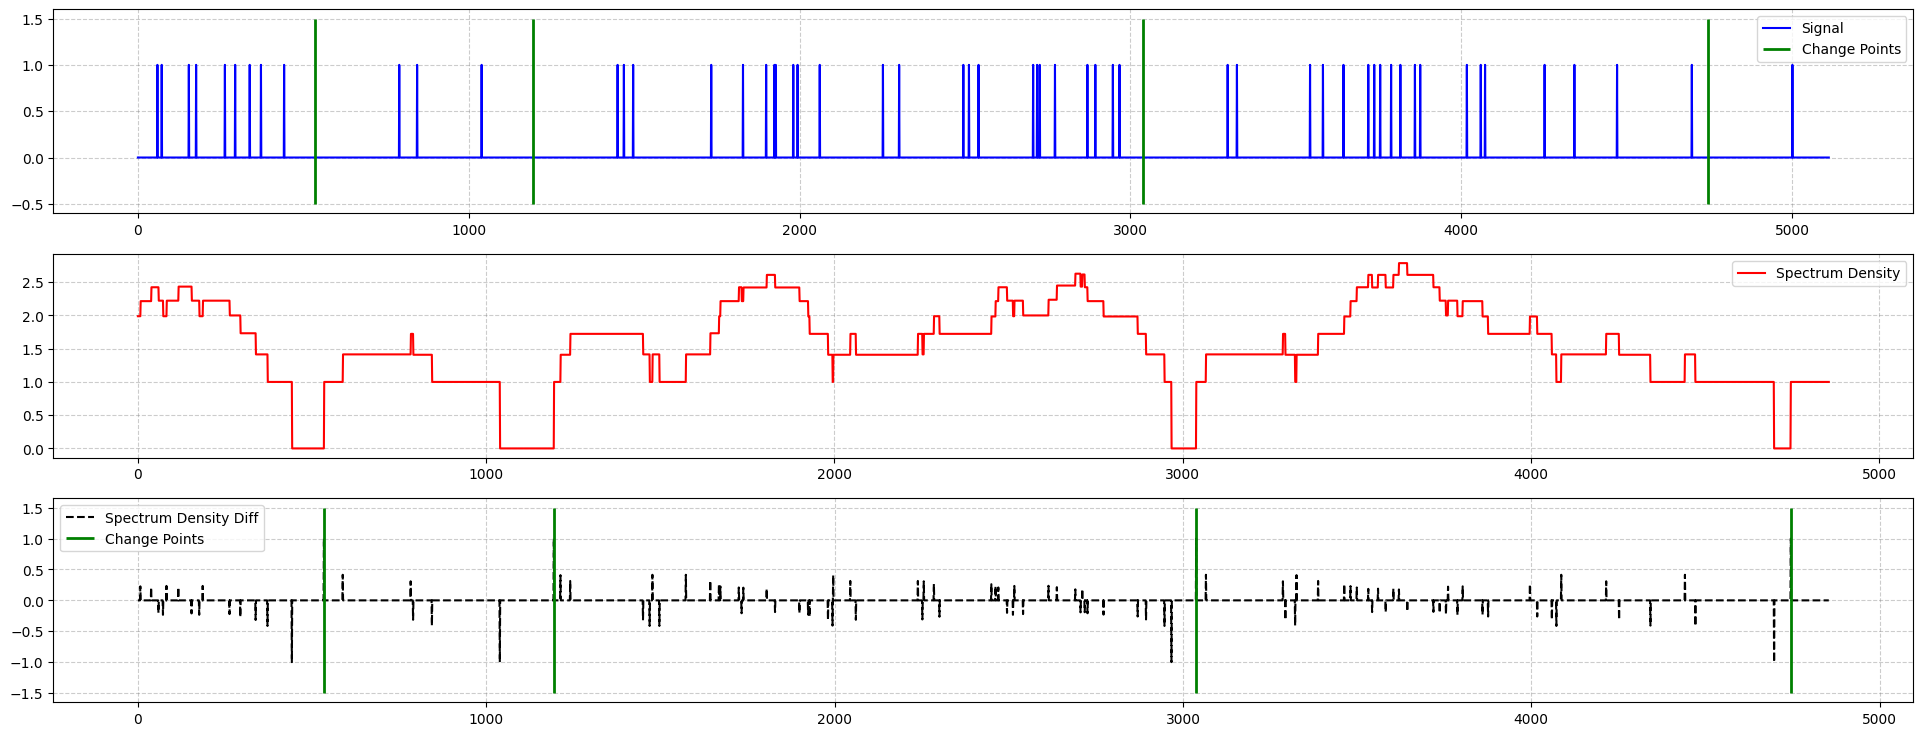

In [6]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
# 設置窗口大小
window_size = 256

# 定義函數來計算窗口內的FFT
# 套用RMS平均化
def compute_fft(signal, window_size):
    fft_result = []
    for i in tqdm(range(window_size, len(signal))):
        window = signal[i-window_size:i]
        yf = fft(window)
        yf = yf[window_size//2:]**2
        fft_result.append(np.abs(yf))
        res = np.sqrt(np.mean(np.array(fft_result), axis = 1))
    return res

# 計算信號的FFT
spectrum_density = compute_fft(sig, window_size)

# 找出由疏變密的時間點（這裡使用簡單的差分來檢測變化）
threshold = 0.5  # 定義一個閾值來檢測變化
change_points = np.where(np.diff(spectrum_density) > threshold)[0]

# 可視化結果
fig, ax = plt.subplots(3, 1, figsize = (24, 9))
ax[0].plot(sig, label='Signal', color = "blue")
ax[0].grid(color = "gray", linestyle = "--", alpha = .4)
ax[0].vlines(change_points, -0.5, 1.5, linewidth = 2,
             color='green', label='Change Points')
ax[0].legend()

ax[1].plot(spectrum_density, label='Spectrum Density', color='red')
ax[1].grid(color = "gray", linestyle = "--", alpha = .4)
ax[1].legend()

temp = np.diff(spectrum_density)
ax[2].plot(temp, label='Spectrum Density Diff', color='black', linestyle = "--")
ax[2].vlines(change_points, np.min(temp) - 0.5, np.max(temp) + 0.5, linewidth = 2,
             color='green', label='Change Points')
ax[2].grid(color = "gray", linestyle = "--", alpha = .4)
ax[2].legend()

print("變化點的位置:", change_points * window_size + window_size//2)

## 以FFT樣態差異進行比較

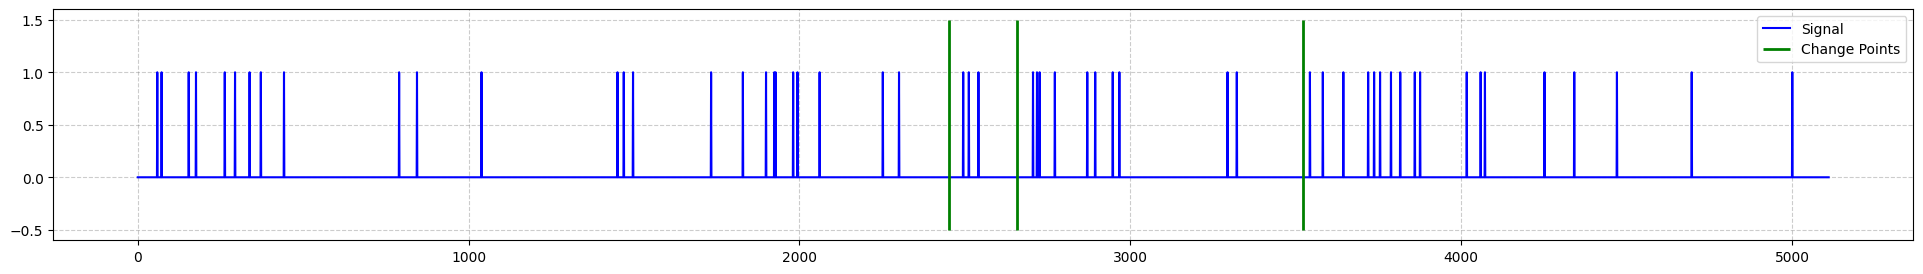

In [22]:
fft_diff = list()
for i in range(120, len(sig), 120):
    temp = sig[i-120:i-60]
    for j in range(1, 60):
        comp = sig[i-120+j:i-60+j]
        fft_temp = np.abs(np.fft.fft(temp))
        fft_comp = np.abs(np.fft.fft(comp))
        if np.mean(fft_comp - fft_temp) > 1:
            fft_diff += [i-120+j]
            break
            
fig, ax = plt.subplots(1, 1, figsize = (24, 3))
ax.plot(sig, label='Signal', color = "blue")
ax.grid(color = "gray", linestyle = "--", alpha = .4)
ax.vlines(fft_diff, -0.5, 1.5, linewidth = 2,
             color='green', label='Change Points')
ax.legend()

## PSD

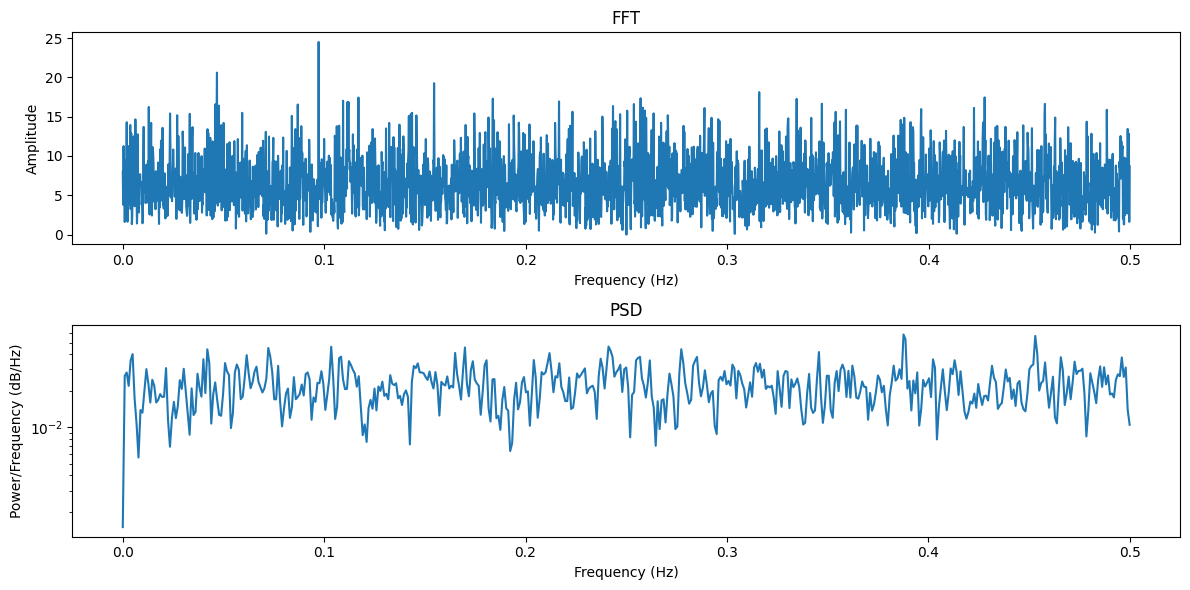

In [38]:
from scipy.signal import welch

# 採樣頻率
fs = 1

# 計算FFT
fft_result = np.fft.fft(sig)
fft_freq = np.fft.fftfreq(len(sig), 1/fs)

# 計算PSD
f, Pxx = welch(sig, fs, nperseg=1024)

# 可視化結果
plt.figure(figsize=(12, 6))

# FFT結果
plt.subplot(2, 1, 1)
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_result)[len(fft_freq)//2:])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# PSD結果
plt.subplot(2, 1, 2)
plt.semilogy(f, Pxx)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

plt.tight_layout()
plt.show()